# Getting Started: PyProcar's `fermi2D` Function

This tutorial provides a comprehensive introduction to plotting 2D Fermi surfaces using PyProcar's `fermi2D` function. You'll learn about all the main arguments, visualization modes, k-space slicing, and plotting configurations.

## What You'll Learn

- **Core `fermi2D` arguments** and their purposes
- **Different visualization modes** for Fermi surface analysis
- **K-space plane selection** and energy slicing
- **Spin texture visualization** and parametric projections
- **Band-specific analysis** and custom configurations
- **Best practices** for 2D Fermi surface analysis

## Prerequisites

- Basic understanding of electronic band structure and Fermi surfaces
- PyProcar installed in your environment  
- DFT calculation data with dense k-point sampling (we'll use example data)

## Overview of `fermi2D` Function

The `fermi2D` function is PyProcar's tool for 2D Fermi surface visualization. It creates cross-sections of the Fermi surface in k-space planes. Its basic syntax is:

```python
pyprocar.fermi2D(
    code='vasp',           # DFT code used
    dirname='.',           # Directory with calculation files
    mode='plain',          # Visualization mode
    fermi=None,           # Fermi energy
    k_z_plane=0.0,        # K_z plane for 2D slice
    # ... many other options
)
```

## 1. Setup and Data Loading

Let's start by importing PyProcar and loading example data. We'll use dense k-point mesh data from a DFT calculation to demonstrate 2D Fermi surface features.

In [1]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()
REL_PATH = "data/examples/fermi2d/non-spin-polarized"
pyprocar.download_from_hf(relpath=REL_PATH, output_path=CURRENT_DIR)
DATA_DIR = CURRENT_DIR / REL_PATH
print(f"Data downloaded to: {DATA_DIR}")

Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\02-fermi2d\data\examples\fermi2d\non-spin-polarized
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\02-fermi2d\data\examples\fermi2d\non-spin-polarized


## 2. Core Arguments of `fermi2D`

Before exploring different modes, let's understand the essential arguments of the `fermi2D` function:

### Essential Arguments

| Argument | Type | Description | Example |
|----------|------|-------------|---------|
| `code` | str | DFT software used | `'vasp'`, `'qe'`, `'abinit'` |
| `dirname` | str | Path to calculation files | `'.'`, `'/path/to/data'` |
| `mode` | str | Visualization mode | `'plain'`, `'parametric'`, `'plain_bands'` |
| `fermi` | float | Fermi energy (eV) | `5.599` |

### K-space and Energy Arguments

| Argument | Type | Description | Default |
|----------|------|-------------|---------|
| `energy` | float | Energy relative to Fermi level | `0.0` (Fermi level) |
| `k_z_plane` | float | K_z coordinate for 2D slice | `0.0` |
| `k_z_plane_tol` | float | Tolerance for k_z plane selection | `0.01` |
| `fermi_shift` | float | Shift Fermi energy | `0.0` |

### Projection Arguments

| Argument | Type | Description | Default |
|----------|------|-------------|---------|
| `atoms` | list | Atom indices for projection | `None` |
| `orbitals` | list | Orbital indices for projection | `None` |
| `spins` | list | Spin channels | `None` |
| `band_indices` | list | Band indices to plot | `None` |
| `band_colors` | list | Colors for specific bands | `None` |

### Advanced Options

| Argument | Type | Description | Default |
|----------|------|-------------|---------|
| `spin_texture` | bool | Show spin texture with arrows | `False` |
| `savefig` | str | Save plot filename | `None` |
| `rotation` | list | Rotation matrix for k-points | `[0,0,0,1]` |
| `translate` | list | Translation vector for k-points | `[0,0,0]` |



## 3. Basic Usage - Plain Mode

The **plain mode** is the simplest way to visualize 2D Fermi surfaces. It shows the Fermi surface cross-section as contour lines at the specified energy and k_z plane.

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

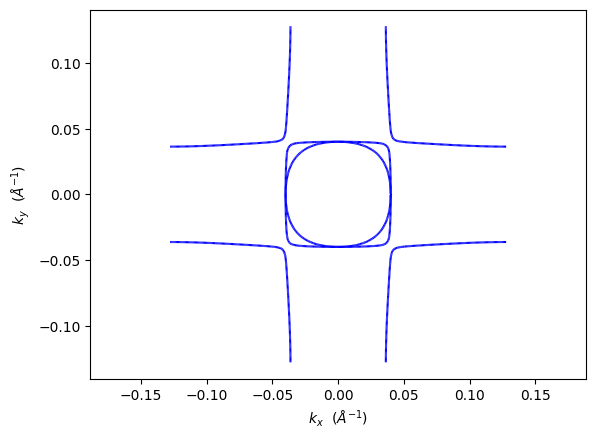

✅ Basic 2D Fermi surface plot created with essential arguments only


In [2]:
# Basic fermi2D usage - showing essential arguments
pyprocar.fermi2D(
    code="vasp",           # Required: DFT software used
    dirname=DATA_DIR,      # Required: Directory with calculation files  
    mode="plain",          # Visualization mode
    fermi=5.3017,    # Fermi energy in eV (shifts energy reference)
    energy=0.0,            # Energy relative to Fermi level (0 = Fermi surface)
    k_z_plane=0.0,         # K_z plane for 2D slice (Γ-plane)
)

print("✅ Basic 2D Fermi surface plot created with essential arguments only")

## 4. Visualization Modes Overview

PyProcar offers several visualization modes for different 2D Fermi surface analysis needs:

| Mode | Purpose | Key Arguments | Use Case |
|------|---------|---------------|----------|
| `'plain'` | Basic Fermi surface contours | None extra | Publication plots, general topology |
| `'plain_bands'` | Individual band contributions | `band_indices`, `band_colors` | Analyzing specific bands |
| `'parametric'` | Color-coded projections | `atoms`, `orbitals`, `spins` | Orbital/atomic character visualization |
| `'spin_texture'` | Spin texture with arrows | `spin_texture=True` | Spin-orbit coupling effects |

### Mode Details

- **Plain**: Shows clean Fermi surface contours without projections
- **Plain bands**: Highlights specific bands with different colors  
- **Parametric**: Colors the Fermi surface by orbital/atomic character
- **Spin texture**: Displays spin direction with arrows on the Fermi surface


## 5. Parametric Mode - Projected Fermi Surface

**Parametric mode** shows atomic/orbital contributions through color coding on the Fermi surface. The color intensity indicates the strength of the orbital/atomic character.

### Orbital Indexing Reference
- **s**: 0
- **p**: 1, 2, 3 (px, py, pz)  
- **d**: 4, 5, 6, 7, 8 (d orbitals)
- **f**: 9, 10, 11, 12, 13, 14, 15 (f orbitals)

### Key Features
- **Color mapping**: Intensity shows orbital/atomic contribution strength
- **Multiple projections**: Can combine atoms, orbitals, and spins
- **Quantitative analysis**: Color scale provides numerical character values

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

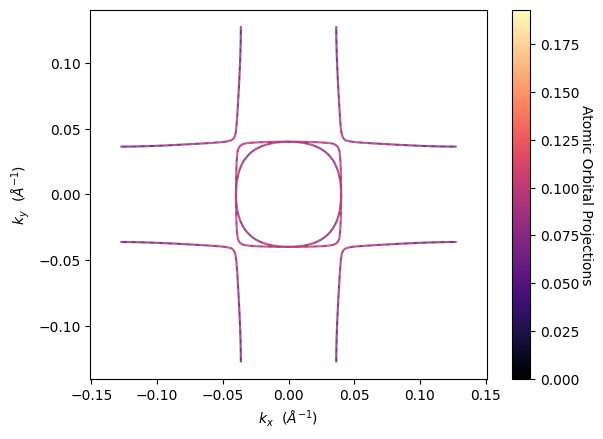

🎨 Parametric mode: Color intensity shows p-orbital contribution strength
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communicati

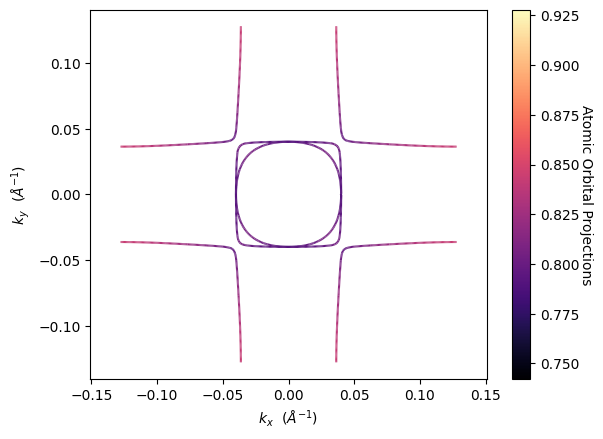

🎨 d-orbital character visualization on Fermi surface


In [3]:
# Parametric mode requires projection arguments
pyprocar.fermi2D(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    energy=0.0,                   # At Fermi level
    k_z_plane=0.0,                # Γ-plane slice
    atoms=[2,3,4],                # Project onto specific atoms (e.g., Oxygen)
    orbitals=[1,2,3],             # p orbitals (indices 1-3) 
    plot_color_bar=True,          # Show color scale
)

print("🎨 Parametric mode: Color intensity shows p-orbital contribution strength")

# Different orbital projection
pyprocar.fermi2D(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    energy=0.0,
    k_z_plane=0.0,
    atoms=[1],                    # Project onto central atom (e.g., V)
    orbitals=[4,5,6,7,8],         # d orbitals (indices 4-8) 
    plot_color_bar=True,
)

print("🎨 d-orbital character visualization on Fermi surface")

## 6. Plain Bands Mode - Individual Band Analysis

The `plain_bands` mode allows you to visualize specific bands with different colors, making it easy to identify individual band contributions to the Fermi surface.

### Plain Bands Benefits
1. **Band-specific analysis**: Isolate contributions from specific bands
2. **Color coding**: Each band gets a unique color for easy identification
3. **Topology understanding**: See how different bands create Fermi surface features

### Usage Tips
- Use `band_indices` to specify which bands to plot
- Use `band_colors` to customize colors for each band
- Combine with energy slicing to study band evolution

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

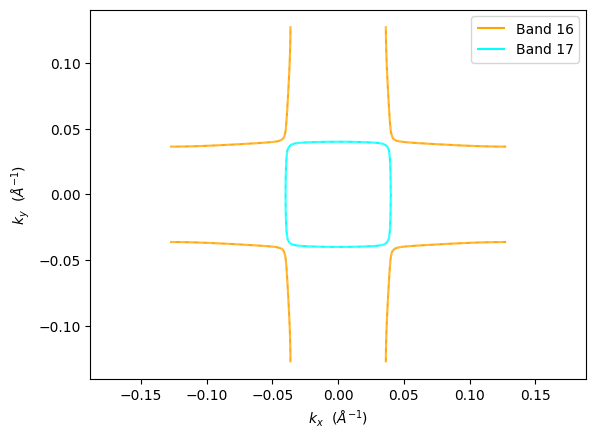

🎯 Plain bands mode: Shows individual band contributions with different colors
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Commun

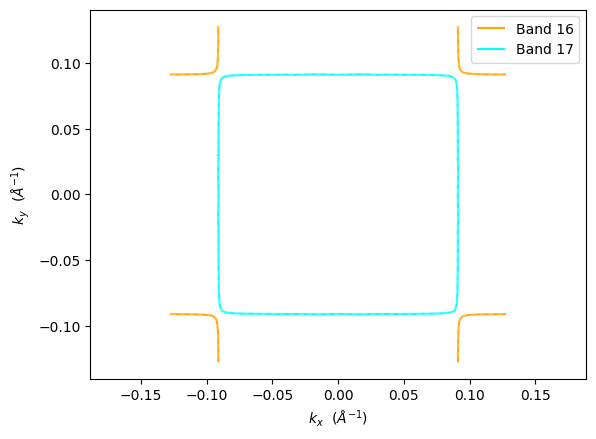

🎯 Energy slice at +0.1 eV: Shows how band topology changes with energy


In [4]:

# Plain bands mode - shows specific band contributions
pyprocar.fermi2D(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain_bands",
    fermi=5.3017,
    energy=0.0,
    k_z_plane=0.0,
    band_indices=[[16,17]],     # Specify bands for each spin (if applicable)
    band_colors=[['orange', 'cyan']], # Colors for each band
    add_legend=True,                    # Show legend with band information
)

print("🎯 Plain bands mode: Shows individual band contributions with different colors")

# Another example with different energy slice
pyprocar.fermi2D(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain_bands",
    fermi=5.3017,
    energy=1.0,                         # Slightly above Fermi level
    k_z_plane=0.0,
    band_indices=[[16,17]],          # Focus on specific bands
    band_colors=[['orange', 'cyan']],
    add_legend=True,
)

print("🎯 Energy slice at +0.1 eV: Shows how band topology changes with energy")

## 7. Advanced Configuration and Performance

### Caching for Performance

PyProcar uses caching to speed up repeated plotting operations by storing parsed electronic band structure data:

```python
use_cache=True   # Default: Use cached EBS data when available  
use_cache=False  # Force re-parsing (useful if data changed)
```

### Plot Customization

The `fermi2D` function accepts many plotting configuration options:

| Option | Description | Example |
|--------|-------------|---------|
| `cmap` | Colormap for parametric mode | `'viridis'`, `'plasma'`, `'RdBu_r'` |
| `linewidth` | Width of Fermi surface lines | `0.5`, `1.0`, `2.0` |
| `add_axes_labels` | Show k-space axis labels | `True` (default), `False` |
| `add_legend` | Show plot legend | `False` (default), `True` |
| `dpi` | Resolution for saved figures | `300`, `'figure'` (default) |

### K-point Transformations

For advanced users, k-points can be transformed:

- **`rotation`**: Rotate k-point coordinates `[0,0,0,1]` (quaternion)
- **`translate`**: Translate k-points `[0,0,0]` 
- **`rot_symm`**: Rotational symmetry operations `1` (default)


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\pyprocar\core\fermisurface2D.py:539: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


⚙️ Advanced customization: High-quality plot with custom styling
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297,

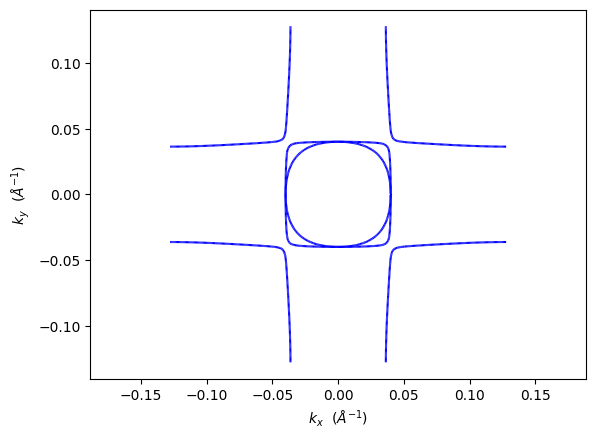

📋 All available plot options printed above


In [5]:
# Advanced customization example
pyprocar.fermi2D(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    energy=0.0,
    k_z_plane=0.0,
    atoms=[1],                         # Central atom
    orbitals=[4,5,6,7,8],              # d orbitals
    
    # Appearance customizations
    cmap="plasma",                     # Custom colormap
    linewidth=1.5,                     # Thicker lines
    add_axes_labels=True,              # Show k-space labels
    add_legend=True,                   # Show legend
    plot_color_bar=True,               # Color scale
    
    # Save high-resolution figure
    savefig=DATA_DIR / "fermi2d_custom.png",
    dpi=300,                           # High DPI for publication
    
    # Performance
    use_cache=True,                    # Use cached data
    verbose=1,                         # Standard verbosity
)

print("⚙️ Advanced customization: High-quality plot with custom styling")

# Print all available plot options
pyprocar.fermi2D(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain",
    fermi=5.3017,
    print_plot_opts=True,              # Print all configuration options
)

print("📋 All available plot options printed above")


## 8. Best Practices and Tips

### 📊 Choosing the Right Mode

- **`'plain'`**: Use for publication figures and general Fermi surface topology
- **`'plain_bands'`**: When you need to identify specific band contributions
- **`'parametric'`**: For analyzing orbital/atomic character on the Fermi surface
- **`'spin_texture'`**: For systems with significant spin-orbit coupling

### 🎯 Key Parameters for Quality Results

1. **Dense k-point sampling**: Fermi surface plotting requires dense k-point meshes (typically 50×50×50 or higher)
2. **Appropriate energy**: Use `energy=0.0` for the Fermi surface, or small values (±0.1 eV) for analysis
3. **k_z plane selection**: Start with `k_z_plane=0.0` (Γ-plane) for most materials
4. **Tolerance settings**: Adjust `k_z_plane_tol` if you have sparse k-points perpendicular to the plane

### 🔧 Troubleshooting Common Issues

| Issue | Solution |
|-------|----------|
| Empty plot | Check `fermi` value, increase `k_z_plane_tol`, verify k-point mesh |
| Fragmented Fermi surface | Increase k-point density in your DFT calculation |
| Missing features | Try different `k_z_plane` values or adjust `energy` |
| Slow performance | Use `use_cache=True` for repeated plotting |



## Summary

Congratulations! You've learned how to use PyProcar's `fermi2D` function for comprehensive 2D Fermi surface analysis. Here's what we covered:

### ✅ Key Concepts Mastered

1. **Basic Usage**: Essential arguments (`code`, `dirname`, `mode`, `fermi`)
2. **Visualization Modes**: `plain`, `plain_bands`, `parametric`, `spin_texture`
3. **K-space Analysis**: Plane selection with `k_z_plane` and `k_z_plane_tol`
4. **Energy Slicing**: Constant energy surfaces with `energy` parameter
5. **Parametric Projections**: Orbital/atomic character visualization
6. **Advanced Configuration**: Custom styling and performance optimization

